# Практические задания

In [2]:
import pandas as pd
from IPython.display import display
churn_df = pd.read_csv('data_13/churn.csv')
display(churn_df.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Задание 1

AttributeError: 'Text' object has no property '0'

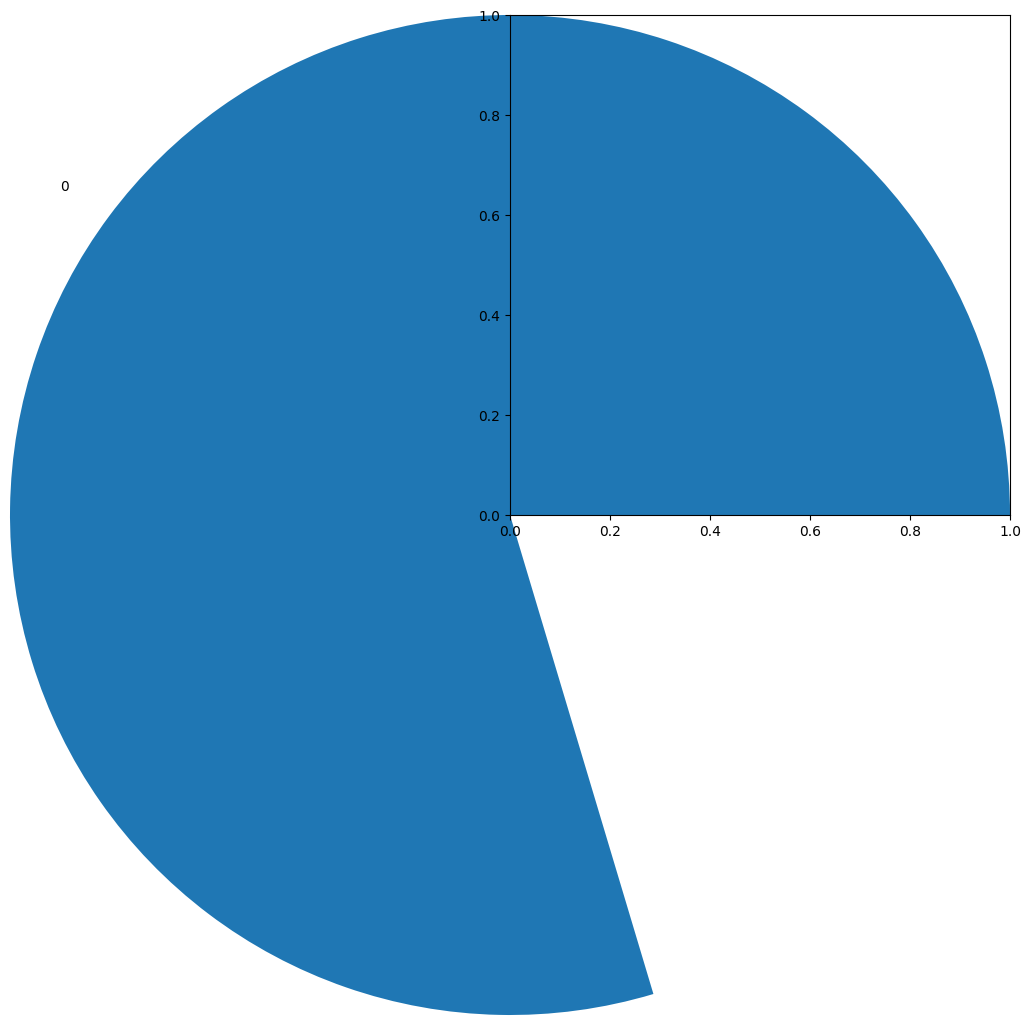

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.style.use('default')
              
exited = churn_df['Exited'].value_counts(normalize=True)*100

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited,
    labels=exited.index,
    autopct='%.2f%%',
    textprops={'0':'Лояльные клиенты', '1':'Ушедшие клиенты'}
)
axes.set_title('Соотношение ушедших и лояльных клиентов')

In [5]:
display(exited)

0    79.63
1    20.37
Name: Exited, dtype: float64